In [54]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)

#============= Read CSV and apply data preperation =============#
df_train = pd.read_csv("pendigits-tra.csv",header = None)
df_test=pd.read_csv("pendigits-tes.csv",header = None)

In [55]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100,5
7490,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0,4
7491,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5,5
7492,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0,1


In [56]:
X_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[: , -1]
X_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[: , -1]

In [57]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

estimator = DecisionTreeClassifier(random_state=2022)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
acc = accuracy_score(y_test, y_pred)
print(acc)


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       363
           1       0.85      0.87      0.86       364
           2       0.86      0.95      0.90       364
           3       0.88      0.93      0.90       336
           4       0.92      0.96      0.94       364
           5       0.94      0.85      0.89       335
           6       0.98      0.94      0.96       336
           7       0.91      0.85      0.88       364
           8       0.94      0.95      0.95       336
           9       0.95      0.92      0.93       336

    accuracy                           0.92      3498
   macro avg       0.92      0.92      0.92      3498
weighted avg       0.92      0.92      0.92      3498

0.9159519725557461


In [59]:
def draw_cm(y_test, y_pred):
  from sklearn import metrics
  import matplotlib.pyplot as plt
  confusion_matrix =metrics.confusion_matrix(y_test, y_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","1", "2", "3","4","5","6","7","8","9"])

  cm_display.plot()

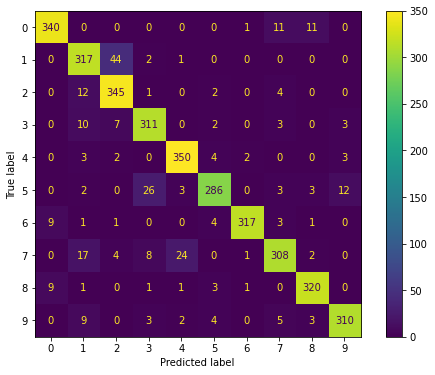

In [60]:
draw_cm(y_test, y_pred)

# Bagging

In [61]:
from sklearn.ensemble import BaggingClassifier

for nEst in range(1, 10):
  estimator = BaggingClassifier(n_estimators=nEst, random_state=2022)
  estimator.fit(X_train, y_train)
  y_pred = estimator.predict(X_test)
  report = classification_report(y_test, y_pred)
  print(report)
  

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       363
           1       0.80      0.84      0.82       364
           2       0.81      0.87      0.84       364
           3       0.89      0.93      0.91       336
           4       0.91      0.96      0.93       364
           5       0.90      0.86      0.88       335
           6       0.94      0.91      0.92       336
           7       0.91      0.85      0.88       364
           8       0.92      0.92      0.92       336
           9       0.95      0.91      0.93       336

    accuracy                           0.90      3498
   macro avg       0.90      0.90      0.90      3498
weighted avg       0.90      0.90      0.90      3498

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       363
           1       0.75      0.94      0.84       364
           2       0.88      0.85      0.87       364
           3       0.86 

Bagging using Decision Tree

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       363
           1       0.86      0.93      0.90       364
           2       0.91      0.96      0.94       364
           3       0.95      0.98      0.96       336
           4       0.96      0.97      0.96       364
           5       0.96      0.88      0.92       335
           6       0.98      0.97      0.98       336
           7       0.98      0.89      0.93       364
           8       0.93      0.98      0.96       336
           9       0.96      0.95      0.95       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498

0.9468267581475128


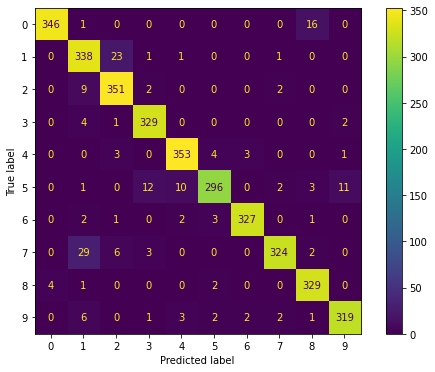

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=2022)
estimator=BaggingClassifier(base_estimator=clf,n_estimators=30,
            max_samples=1.0)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
acc = accuracy_score(y_test, y_pred)
print(acc)
draw_cm(y_test, y_pred)

Bagging using SVM

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       363
           1       0.96      0.96      0.96       364
           2       0.96      0.99      0.98       364
           3       0.99      0.99      0.99       336
           4       1.00      0.99      0.99       364
           5       0.99      0.98      0.98       335
           6       1.00      1.00      1.00       336
           7       0.99      0.95      0.97       364
           8       0.97      1.00      0.98       336
           9       0.98      0.99      0.98       336

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498

0.982275586049171


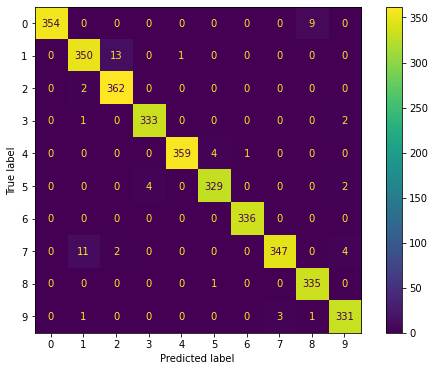

In [63]:
from sklearn import svm

model = svm.SVC()
estimator_SVM=BaggingClassifier(base_estimator=model,n_estimators=30,
            max_samples=1.0)
estimator_SVM.fit(X_train, y_train)
y_pred_SVM = estimator_SVM.predict(X_test)
report = classification_report(y_test, y_pred_SVM)
print(report)
acc = accuracy_score(y_test, y_pred_SVM)
print(acc)
draw_cm(y_test, y_pred_SVM)

Getting best number of Estimators

In [64]:
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot as plt
def get_best_num_est(n1,n2):
  estimatorts=[]
  accuracys=[]
  max_acc=0
  c=0
  for nEst in range(n1, n2):
    clf=DecisionTreeClassifier(random_state=2022)
    estimator = BaggingClassifier(base_estimator=clf,n_estimators=nEst, random_state=2022)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    report = classification_report(y_test, y_pred)
    #print(report)
    acc = accuracy_score(y_test, y_pred)
    if acc>max_acc:
      max_acc=acc
      c=nEst
    estimatorts.append(nEst) 
    accuracys.append(acc) 
    #print(acc)
    
  plt.plot(estimatorts, accuracys)
  plt.xlabel("Number of estimators")
  plt.ylabel("Accuracy")
    
  plt.show()
  return(max_acc,c)  
  

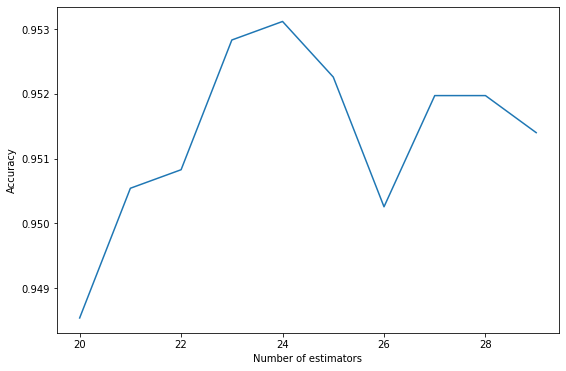

(0.9531160663236135, 24)


In [65]:
print(get_best_num_est(20,30))

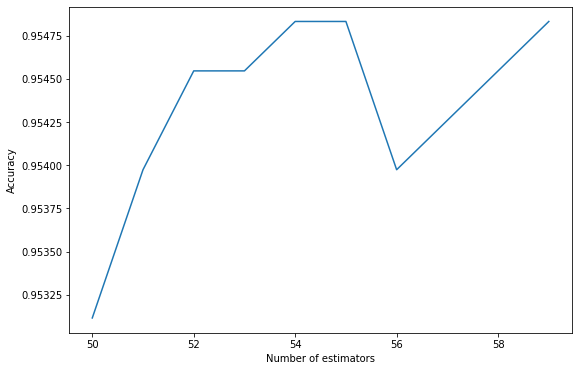

(0.9548313321898227, 54)


In [66]:
print(get_best_num_est(50,60))

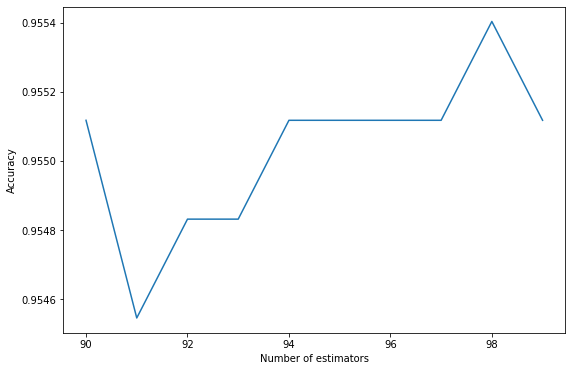

(0.9554030874785592, 98)


In [67]:
print(get_best_num_est(90,100))

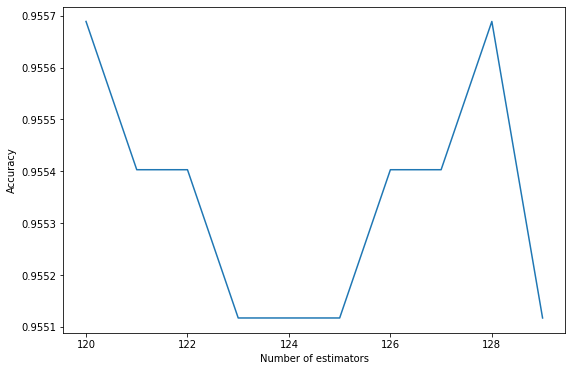

(0.9556889651229273, 120)


In [68]:
print(get_best_num_est(120,130))

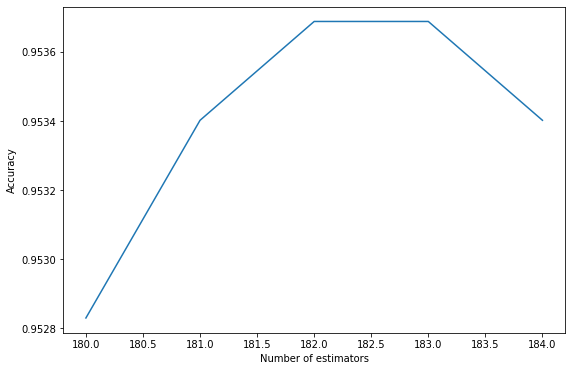

(0.9536878216123499, 182)


In [69]:
print(get_best_num_est(180,185))

# Boosting

## (a) Use GradientBoosting classifier to classify test set samples. There are 2 important
hyperparameters in GradientBoosting, i.e., the number of estimators, and
learning rate. First, tune number of estimators parameter by trying 4 values in the interval of [10, 200]. Then by using the tuned value for number of estmators,
tune the learning rate parameter by trying 4 values within the range of
[0.1, 0.9]. Display accuracy and Confusion Matrix separately for the best value
of both parameters (Number of estimators and learning rate).

the best accuracy score is = 0.9651229273870783 when number of estimators = 100 and learning rate =0.3
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.91      0.95      0.93       364
           2       0.95      0.99      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.97      0.95       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



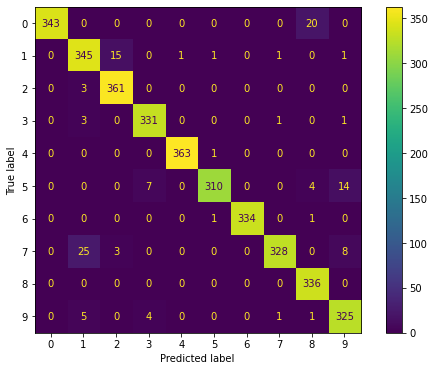

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
best_acc = 0
best_nEst= 0
# best_pred = []
for nEst in [10, 100, 150, 200]:
  estimator = GradientBoostingClassifier(n_estimators=nEst, random_state=2022)
  estimator.fit(X_train, y_train)
  y_pred = estimator.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  if acc > best_acc:
    best_acc = acc
    best_nEst = nEst
    # best_pred = y_pred
# print("best number of estimators  = ",best_nEst)
best_acc = 0
best_learning_rate= 0
best_pred = []
for lRate in [.1, .3, .6, .9]:
  estimator = GradientBoostingClassifier(n_estimators=best_nEst, learning_rate=lRate, random_state=2022)
  estimator.fit(X_train, y_train)
  y_pred = estimator.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  if acc > best_acc:
    best_acc = acc
    best_learning_rate = lRate
    best_pred = y_pred

print(f'the best accuracy score is = {best_acc} when number of estimators = {best_nEst} and learning rate ={best_learning_rate}')
report = classification_report(y_test, best_pred)
print(report)
draw_cm(y_test, best_pred)

# plotEstimator(X_train, y_train, X_test, y_test, estimator, f'Gradient Boosting {nEst}')

## (b) Build XGBoost classifier with the same parameters that you obtained in question
(4-a). Provide accuracy and Confusion Matrix

In [71]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\users\river\anaconda3\lib\site-packages (from xgboost) (1.8.1)



the XGBClassifier accuracy score is = 0.9668381932532876 with number of estimators = 100 and learning rate =0.3
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       363
           1       0.92      0.95      0.94       364
           2       0.94      1.00      0.97       364
           3       0.97      0.99      0.98       336
           4       0.97      0.99      0.98       364
           5       0.99      0.96      0.97       335
           6       0.99      0.99      0.99       336
           7       0.99      0.90      0.94       364
           8       0.94      0.99      0.96       336
           9       0.98      0.96      0.97       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



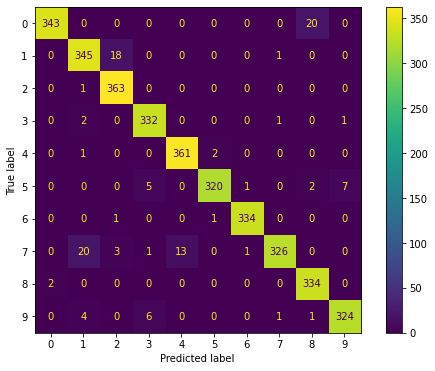

In [72]:
from xgboost import XGBClassifier
estimator = XGBClassifier(n_estimators=best_nEst, learning_rate=best_learning_rate, random_state=2022)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'the XGBClassifier accuracy score is = {acc} with number of estimators = {best_nEst} and learning rate ={best_learning_rate}')
report = classification_report(y_test, y_pred)
print(report)
draw_cm(y_test, y_pred)